[4.52787538 5.8541781 ]


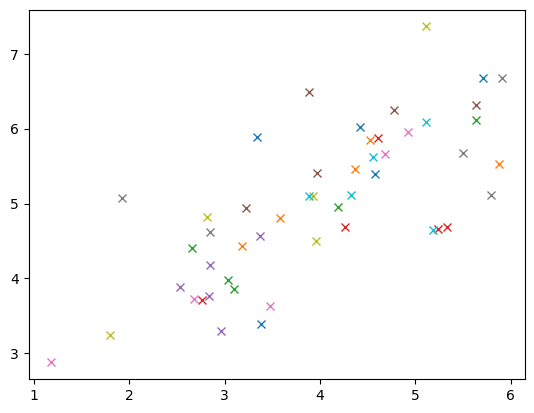

In [182]:
from mat4py import loadmat
import matplotlib.pyplot as plt
import numpy as np
import math
import random
data = loadmat('ex7data1.mat')
X=np.array(data['X'])
centroids=[]
print(X[1])
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1],'x')

In [183]:
k=3 # defining number of clusters
C=[]
for i in range(k):  #  randomly choosing centroids 
    C.append(np.random.randint(1,6,2))
C=np.array(C)
centroids.append(C)
print(centroids)

[array([[1, 2],
       [2, 4],
       [4, 5]])]


In [184]:
def distance(C,k):
    clus={}
    for i in range (len(X)):
        d=[]
        for j in range(k):
            d.append(np.sum(np.fabs(X[i]-C[j])))
        mind=min(d)
        ind=d.index(min(d))
        clus[i]=ind  # i-data point, ind- which cluster
    return clus


In [185]:
clus=distance(C,k)
print(clus)
x1=[]
x2=[]
x3=[]
def collection(clus):
    for i in range(len(clus)):
        if clus[i]==0:
            x1.append(X[i])
            
        elif clus[i]==1:
            x2.append(X[i])
            
        elif clus[i]==2:
            x3.append(X[i])
        
            
    return x1,x2,x3
x1,x2,x3=collection(clus)
print(x1)
        

{0: 1, 1: 2, 2: 1, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 1, 15: 2, 16: 2, 17: 1, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 1, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 1, 33: 2, 34: 2, 35: 2, 36: 1, 37: 2, 38: 1, 39: 2, 40: 2, 41: 2, 42: 1, 43: 2, 44: 1, 45: 2, 46: 0, 47: 1, 48: 2, 49: 2}
[array([1.18023321, 2.87869409])]


In [186]:
c=[]
def centroid(x1,x2,x3):
    c1=np.sum(x1,axis=0)/len(x1)
    c2=np.sum(x2,axis=0)/len(x2)
    c3=np.sum(x3,axis=0)/len(x3)
    c.append(c1)
    c.append(c2)
    c.append(c3)
    return c
c=centroid(x1,x2,x3)
centroids.append(c)
print(c)


[array([1.18023321, 2.87869409]), array([2.77433985, 3.9135408 ]), array([4.55549351, 5.49920078])]


In [187]:
dif=1
while dif>0.001:
    clus=distance(c,k)
    x1=[]
    x2=[]
    x3=[]
    x1,x2,x3=collection(clus)
    c=[]
    c=centroid(x1,x2,x3)
    centroids.append(c)
    d=np.fabs(np.subtract(centroids[-1],centroids[-2]))
    print(d)
    for i in d:
        print(i)
        if i[0]<0.001 and i[1]<0.001:
            dif=i[0]

[[0.30843197 0.18442238]
 [0.14560508 0.2220936 ]
 [0.18150229 0.10429196]]
[0.30843197 0.18442238]
[0.14560508 0.2220936 ]
[0.18150229 0.10429196]
[[0.         0.        ]
 [0.08921272 0.05457048]
 [0.06686414 0.06547854]]
[0. 0.]
[0.08921272 0.05457048]
[0.06686414 0.06547854]


In [167]:
print(centroids)

[array([[2, 5],
       [4, 4],
       [1, 5]]), [array([2.65802204, 4.71594219]), array([4.27802087, 5.10119055]), array([1.18023321, 2.87869409])], [array([2.91994493, 4.1356344 ]), array([4.73699581, 5.60349274]), array([1.48866517, 3.06311647])], [array([3.00915764, 4.19020487]), array([4.80385995, 5.66897128]), array([1.48866517, 3.06311647])]]


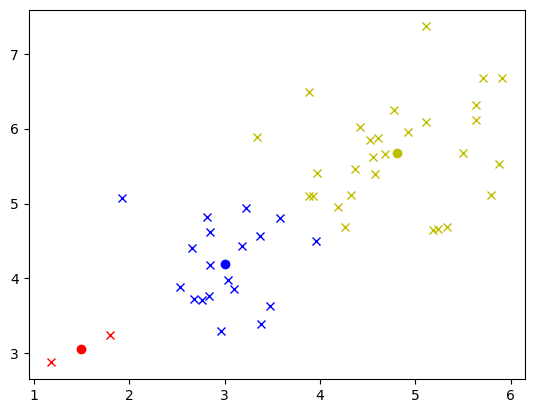

In [190]:

for i in range(len(x1)):
    plt.plot(x1[i][0],x1[i][1],'rx')
for i in range(len(x2)):
    plt.plot(x2[i][0],x2[i][1],'bx')
for i in range(len(x3)):
    plt.plot(x3[i][0],x3[i][1],'yx')
plt.plot(3.00915764, 4.19020487,'bo')
plt.plot(4.80385995, 5.66897128,'yo')
plt.plot(1.48866517, 3.06311647,'ro')